In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

## 請安裝
> pip install opencv-python

# Problem : K-Means Clustering
**K-Means Clustering** is an unsupervised learning algorithm for data grouping. In image segmen- tation, it can be applied to partition image pixels into different groups based on the associated pixel values or features. In this problem, you will learn how to segment the provided image by using K-means clustering.

In [3]:
img = cv2.imread('data/bird.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1-1. cluster with only RGB values

In [6]:
def km_clust(array, n_clusters):   
    # Define the k-means clustering problem
    k_m = KMeans(n_clusters = n_clusters)
    # Solve the k-means clustering problem
    k_m.fit(array)
    # Get the coordinates of the clusters centres
    center = k_m.cluster_centers_
    print(center)
    # Get the label of each point
    label = k_m.labels_
    return(label, center)

[[107.69008695  95.56129696  71.60061825]
 [163.22597756 197.72311134 120.58332123]]
[[160.65513123 204.76064641 114.71482599]
 [ 58.37121466  55.1944636   46.14034085]
 [183.98456705 182.78074014 164.96576467]
 [143.94450436 128.31196922  97.22564062]]
[[155.01631063 192.68488617 110.55349375]
 [137.72163962 119.1947986   83.36158856]
 [203.38874649 204.22488496 194.5287051 ]
 [156.85489399 143.62289463 117.01077087]
 [ 99.86818782  87.3432289   60.41213868]
 [176.06996367 174.92103507 152.93091125]
 [163.80172706 211.95172004 116.97351554]
 [ 33.8041595   37.23881059  39.71718804]]
[[166.65181671 216.7777035  117.18424438]
 [112.18693451  98.58703145  64.52601249]
 [159.25311718 191.41151058 118.64497295]
 [ 30.72244645  39.33405775  45.87033013]
 [143.3623393  126.3702534   93.39849149]
 [198.69550783 197.89213361 193.90859814]
 [153.33514717 149.33217907 136.32352214]
 [233.93789144 210.61143006  37.85099165]
 [ 95.47563805  79.01093802  48.12363275]
 [137.89036586 179.31807893 105

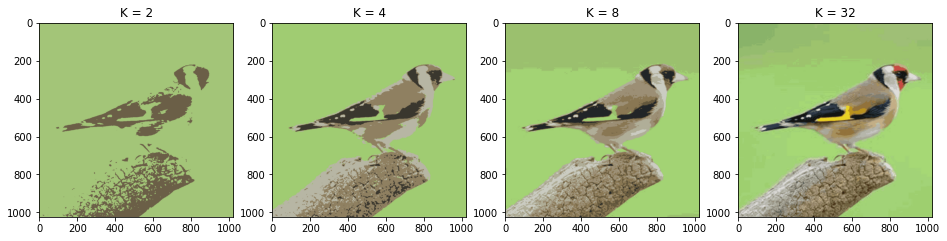

In [14]:
h, w, c = img.shape
Z = img.reshape(-1, 3)
Ka = [2,4,8,32]
plt.figure(figsize=(16,12))

for i,K in enumerate(Ka): # 同時讀位置與資料 enumerate
    label, center = km_clust(Z, K)
    center = np.uint8(center[:,:3])
    res = center[label.flatten()]
    res = res.reshape(img.shape)
    
    plt.subplot(1,len(Ka),i+1)
    plt.title('K = {}'.format(K))
    plt.imshow(res)
plt.show()

## 1-2. cluster with RGB values and the location

[[154.52318603 186.80495494 117.1411548  508.67015096 255.08907579]
 [156.36855434 180.03453489 110.31573045 514.320247   767.04088892]]
[[150.40474863 191.76324572 112.11061563 513.26947963 217.63010055]
 [159.88241977 202.08504815 117.65256943 856.90484797 857.87969155]
 [157.15683034 182.08355282 114.13259743 166.33952927 852.67213005]
 [147.77459512 145.95660348 104.58820473 796.02757744 517.78421373]
 [154.1906228  188.78804655 108.81971808 231.12299982 511.87762836]
 [160.0883946  181.49986832 110.4938254  511.2924161  806.26912702]
 [164.31435268 187.570187   134.27232389 854.56069528 171.04909337]
 [151.98559753 194.06550746 111.71475273 166.73096489 170.89819031]]
[[165.02192122 167.87969592 109.02874914 612.39032481 534.73420871]
 [161.8144311  208.60627731 122.87530943 430.61327588 252.5402341 ]
 [ 52.66794287  47.27420237  46.24794895 392.59829839 751.67669401]
 [158.84851247 193.81060894 112.5716673  109.82093936 754.82764907]
 [142.45246638 133.20732582 114.19384731 945.6

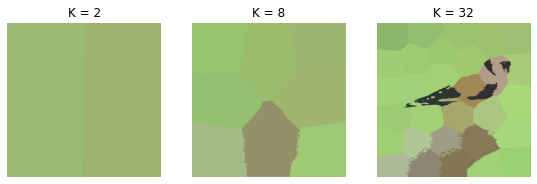

In [16]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h], [w]])
Z = Z.reshape(-1, 5)

Ks = [2,8,32]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()

## 1-3. explain the differences between the two methods under the same K.
![](images/7.4_result.PNG)

[[157.91946744 193.10921608 119.92889454 122.20503382  60.97556413]
 [153.23914833 174.75314536 108.17853248 132.94004093 187.63697565]]
[[167.97318344 200.55792894 133.51957609 187.73253571  52.87781703]
 [132.37337136 120.08881937  90.53196238 218.31631884 127.86086683]
 [162.61573675 144.8534448  105.57429671 123.68930047 156.71191701]
 [166.6348005  198.51074183 122.24984817  56.52327144 220.72088318]
 [156.15678374 200.89168843 114.50824586  67.04234469  41.94325171]
 [164.63380544 211.29467901 120.42978076 194.4333478  212.24637324]
 [ 47.03151649  47.97945135  45.90963732 116.81301372 136.63072794]
 [158.11751643 199.71201377 110.6967989   45.32716715 126.14017534]]


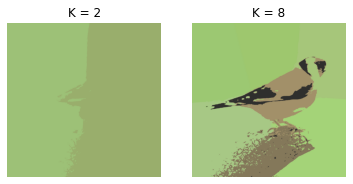

In [17]:
h, w, c = img.shape

#Added location feature
Z = np.zeros((h, w, c+2))
for h in range(len(img)):
    for w in range(len(img[h])):
        Z[h][w] = np.append(img[h][w], [[h/4], [w/4]])
Z = Z.reshape(-1, 5)

Ks = [2,8]
plt.figure(figsize=(16,12))

for i, K in enumerate(Ks):
    label, center = km_clust(Z, K)

    # Now convert back into uint8, and make original image
    center = np.uint8(center[:, :3])
    res = center[label.flatten()]
    res = res.reshape((img.shape))

    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("K = {}".format(K))
    plt.imshow(res)
    
plt.show()